In [6]:
import a4_lib
import a4_ex1_solution
import torch

In [7]:
NUM_EPOCH       = 5
LEARNING_RATE   = 0.001
BATCH_SIZE      = 100
MAX_SAMPLES     = None # Default: None => all data
VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH

[ALERT] GPU not found, use CPU!
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: []
=== Data Loaded [Testing] ===
=== Loading Data ... 
> Resized to (32, 32)
=== Data Loaded [Training] ===
> epoch 1/2:
  >> Learning (wip)
  >> Testing (wip)
    epoch 1 > Training: [LOSS: 3.8081 | ACC: 0.0900] | Testing: [LOSS: 2.3097 | ACC: 0.1300] Ellapsed: 7.14 s | rate:1.84016
> epoch 2/2:
  >> Learning (wip)
  >> Testing (wip)
    epoch 2 > Training: [LOSS: 2.2889 | ACC: 0.0900] | Testing: [LOSS: 2.2840 | ACC: 0.1700] Ellapsed: 6.40 s | rate:1.72246


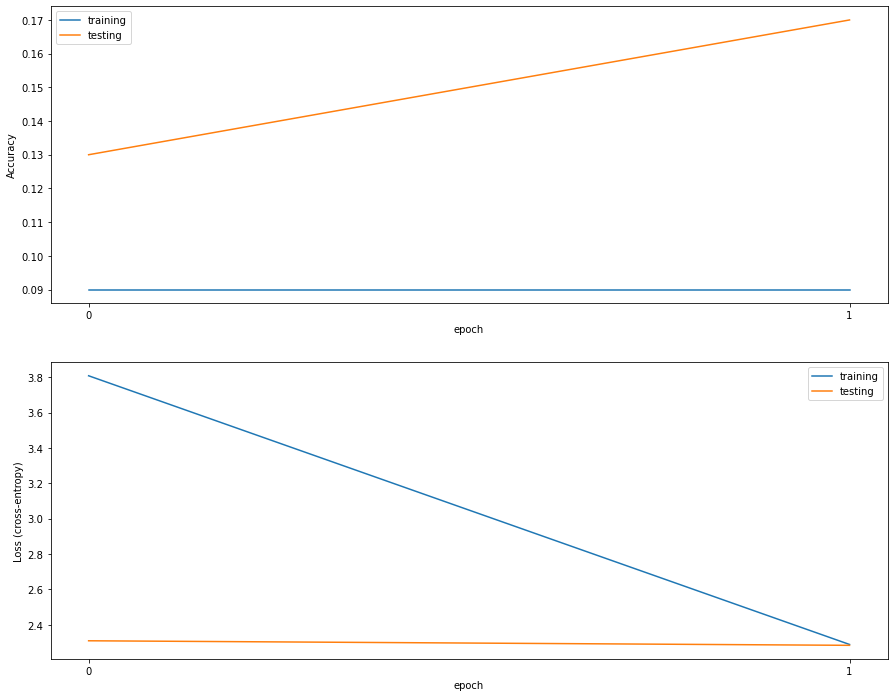

==== P4.3 : Test: HFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [HFlip-1] test_loss: 2.322472906112671, test_acc: 0.13, test_n: 100, test_ellapse: 1.850740909576416
==== P4.3 : Test: VFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['VFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [VFlip-1] test_loss: 2.28782434463501, test_acc: 0.11, test_n: 100, test_ellapse: 1.9300100803375244
==== P4.3 : Test: GAUSS-0.01
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.01']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.01] test_loss: 2.296737289428711, test_acc: 0.17, test_n: 100, test_ellapse: 1.7349779605865479
==== P4.3 : Test: GAUSS-0.1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.1] test_loss: 2.2989893198013305, test_acc: 0.17, test_n: 100, test_ellaps

In [3]:
# Raw Trial:
model1 = a4_ex1_solution.solve_a4_ex1(
    # USER DEFINE: ----- ----- ----- ----- ----- ----- ----- ----- ----- #
    TOTA_NUM_EPOCHS = NUM_EPOCH,
    LEARNING_RATE   = LEARNING_RATE,
    BATCH_SIZE      = BATCH_SIZE,
    MAX_SAMPLES     = MAX_SAMPLES, # Default: None => all data
    # const:
    OUT_DIR_E1      = "output/E1",
    IMG_SIZE        = (32, 32),
    VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH,
    TRAINING_AUG    = [], # Options: ["HFlip", "VFlip", "GAUSS-0.01"],
)

[ALERT] GPU not found, use CPU!
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip', 'VFlip', 'GAUSS-0p5-0p5']
=== Data Loaded [Testing] ===
=== Loading Data ... 
> Resized to (32, 32)
=== Data Loaded [Training] ===
> epoch 1/2:
  >> Learning (wip)
  >> Testing (wip)
    epoch 1 > Training: [LOSS: 3.5712 | ACC: 0.0900] | Testing: [LOSS: 2.3648 | ACC: 0.1100] Ellapsed: 7.18 s | rate:1.76400
> epoch 2/2:
  >> Learning (wip)
  >> Testing (wip)
    epoch 2 > Training: [LOSS: 2.4430 | ACC: 0.0800] | Testing: [LOSS: 2.3196 | ACC: 0.1200] Ellapsed: 7.26 s | rate:1.95242


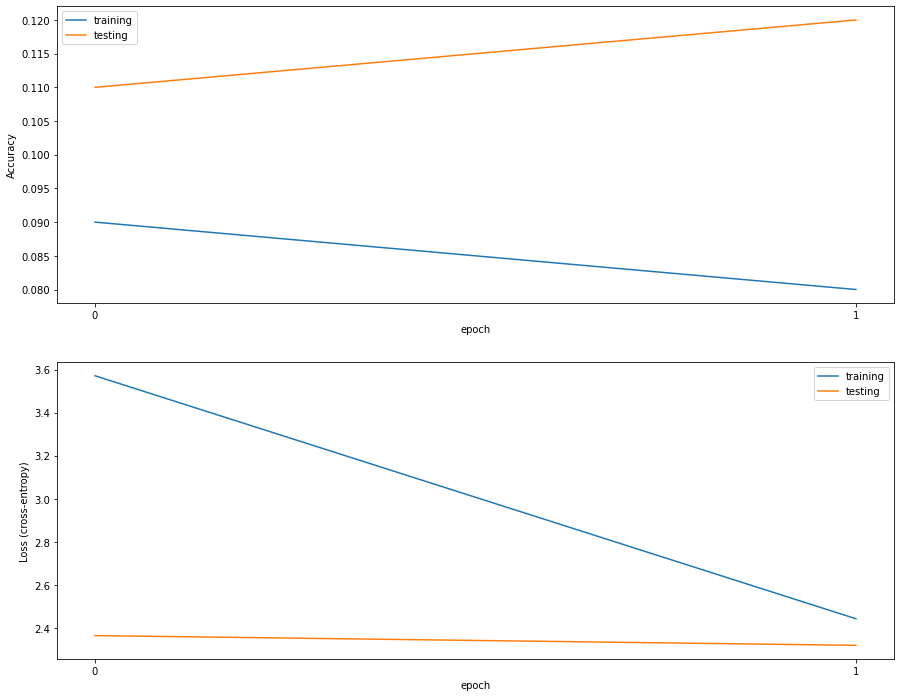

==== P4.3 : Test: HFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [HFlip-1] test_loss: 2.316429543495178, test_acc: 0.17, test_n: 100, test_ellapse: 1.8763689994812012
==== P4.3 : Test: VFlip-1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['VFlip-1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [VFlip-1] test_loss: 2.328289008140564, test_acc: 0.1, test_n: 100, test_ellapse: 1.8457038402557373
==== P4.3 : Test: GAUSS-0.01
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.01']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.01] test_loss: 2.3244483709335326, test_acc: 0.15, test_n: 100, test_ellapse: 2.278794050216675
==== P4.3 : Test: GAUSS-0.1
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.1']
=== Data Loaded [Training] ===
  >> Testing (wip)
> [GAUSS-0.1] test_loss: 2.3155472755432127, test_acc: 0.13, test_n: 100, test_ellap

In [4]:
# Augmented Trial
model2 = a4_ex1_solution.solve_a4_ex1(
    # USER DEFINE: ----- ----- ----- ----- ----- ----- ----- ----- ----- #
    TOTA_NUM_EPOCHS = NUM_EPOCH,
    LEARNING_RATE   = LEARNING_RATE,
    BATCH_SIZE      = BATCH_SIZE,
    MAX_SAMPLES     = MAX_SAMPLES, # Default: None => all data
    # const:
    OUT_DIR_E1      = "output/E1",
    IMG_SIZE        = (32, 32),
    VERBOSE_LEVEL   = a4_lib.VerboseLevel.HIGH,
    TRAINING_AUG    = ["HFlip", "VFlip", "GAUSS-0p5-0p5"],
)

=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['HFlip-1']
=== Data Loaded [Training] ===
> [tensor([7])] p1:tensor([0]), p2:tensor([9])
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['VFlip-1']
=== Data Loaded [Training] ===
> [tensor([7])] p1:tensor([7]), p2:tensor([3])
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.01']
=== Data Loaded [Training] ===
> [tensor([7])] p1:tensor([7]), p2:tensor([3])
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-0.1']
=== Data Loaded [Training] ===
> [tensor([7])] p1:tensor([4]), p2:tensor([3])
=== Loading Data ... 
> Resized to (32, 32)
> Augmentation: ['GAUSS-1']
=== Data Loaded [Training] ===
> [tensor([7])] p1:tensor([4]), p2:tensor([3])


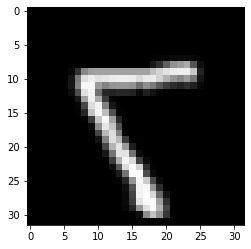

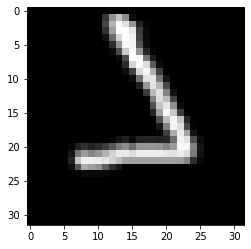

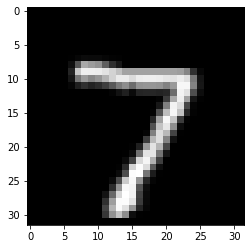

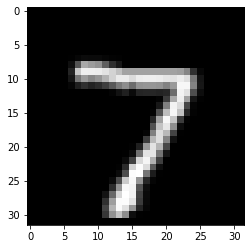

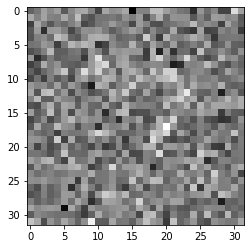

In [5]:
import numpy as np
import matplotlib.pyplot as plt

for aug in ["HFlip-1", "VFlip-1", "GAUSS-0.01", "GAUSS-0.1", "GAUSS-1"]:
    test_dataset  = a4_lib.A4_EX1_CNN_HELPER.load_mnist_data(
        batch_size   = 1, 
        resize       = (32, 32), # NOTE: make sure you understand why
        n_workers    = 1,
        augmentation = [aug], # Options: ["HFlip", "VFlip", "GAUSS-0.01"],
        shuffle      = False,
        train_set    = False,
    )
    test_sample = None
    test_label = None
    for x, label in test_dataset:
        test_sample = x
        test_label = label
        break

    plt.figure()
    plt.imshow(test_sample[0][0], "gray")

    y_pred1 = model1(test_sample).argmax(dim=1)
    y_pred2 = model2(test_sample).argmax(dim=1)

    print("> [{}] p1:{}, p2:{}".format(test_label, y_pred1, y_pred2))